# Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Import your modules
from bicgstab import bicgstab
from test_problems import poisson_2d, convection_diffusion_2d
from helpers import build_ilu_preconditioner, run_scipy_solver
from comparison import compare_all_solvers
from visualization import (plot_convergence_comparison, 
                           plot_cgs_spiking_demo,
                           create_summary_table)

print("="*80)
print("BiCGSTAB Study - All modules loaded")
print("="*80)

BiCGSTAB Study - All modules loaded


# BICGSTAB VALIDATION

In [4]:
print("\n" + "█"*80)
print("BICGSTAB VALIDATION")
print("█"*80)

print("\nValidating our BiCGSTAB implementation against SciPy...")

# Test problem
nx = ny = 40
A_val = convection_diffusion_2d(nx, ny, diffusion=0.01, vel=(2.0, 1.0))
N_val = A_val.shape[0]
x_true_val = np.ones(N_val)
b_val = A_val.dot(x_true_val)
x0_val = np.zeros_like(b_val)

print(f"Problem: Conv-Diff High Péclet (40×40)")
print(f"Size: {N_val} unknowns")
print(f"Péclet number ≈ 200\n")

# Our implementation
print("Our BiCGSTAB:")
t0 = time.time()
x_ours, info_ours = bicgstab(A_val, b_val, x0=x0_val, tol=1e-8, maxiter=1000)
t_ours = time.time() - t0
err_ours = np.linalg.norm(x_ours - x_true_val)
print(f"  Iterations: {info_ours['iterations']}")
print(f"  Error: {err_ours:.3e}")
print(f"  Time: {t_ours:.3f}s")

# SciPy reference
print("\nSciPy BiCGSTAB:")
x_scipy, info_scipy, t_scipy = run_scipy_solver('bicgstab', A_val, b_val, x0_val)
err_scipy = np.linalg.norm(x_scipy - x_true_val)
print(f"  Iterations: {info_scipy['iterations']}")
print(f"  Error: {err_scipy:.3e}")
print(f"  Time: {t_scipy:.3f}s")

# Compare
print(f"\n{'='*70}")
print("VALIDATION RESULTS:")
print(f"{'='*70}")
print(f"Iteration difference: {abs(info_ours['iterations'] - info_scipy['iterations'])}")
print(f"Error difference:     {abs(err_ours - err_scipy):.3e}")

if abs(info_ours['iterations'] - info_scipy['iterations']) <= 2:
    print(f"\n✅ VALIDATION PASSED - Implementations match!")
else:
    print(f"\n⚠️  Small difference detected")

print(f"{'='*70}")


████████████████████████████████████████████████████████████████████████████████
BICGSTAB VALIDATION
████████████████████████████████████████████████████████████████████████████████

Validating our BiCGSTAB implementation against SciPy...
Problem: Conv-Diff High Péclet (40×40)
Size: 1600 unknowns
Péclet number ≈ 200

Our BiCGSTAB:
  Iterations: 74
  Error: 2.598e-07
  Time: 0.012s

SciPy BiCGSTAB:
  Iterations: 74
  Error: 2.598e-07
  Time: 0.013s

VALIDATION RESULTS:
Iteration difference: 0
Error difference:     9.116e-14

✅ VALIDATION PASSED - Implementations match!


# Test 1 - Poisson Problem (Symmetric SPD)


████████████████████████████████████████████████████████████████████████████████
CELL 9: TEST 1 - POISSON EQUATION (Symmetric SPD)
████████████████████████████████████████████████████████████████████████████████

Problem: Poisson 2D (50×50)
Size: 2500 unknowns
Preconditioning: None

Running BiCGSTAB (Our Implementation - Validated)...
  ✓ Converged: True, Iters: 71, Error: 8.348e-07, Time: 0.013s

Running BiCG (SciPy Reference)...
  ✓ Converged: True, Iters: 96, Error: 1.036e-07, Time: 0.025s

Running CGS (SciPy Reference)...
  ✓ Converged: True, Iters: 76, Error: 8.713e-09, Time: 0.014s

Running GMRES(20) (SciPy Reference)...
  ✓ Converged: True, Iters: 22, Error: 1.557e-05, Time: 0.107s

Running CG (SciPy Reference - Symmetric Baseline)...
  ✓ Converged: True, Iters: 96, Error: 1.036e-07, Time: 0.007s


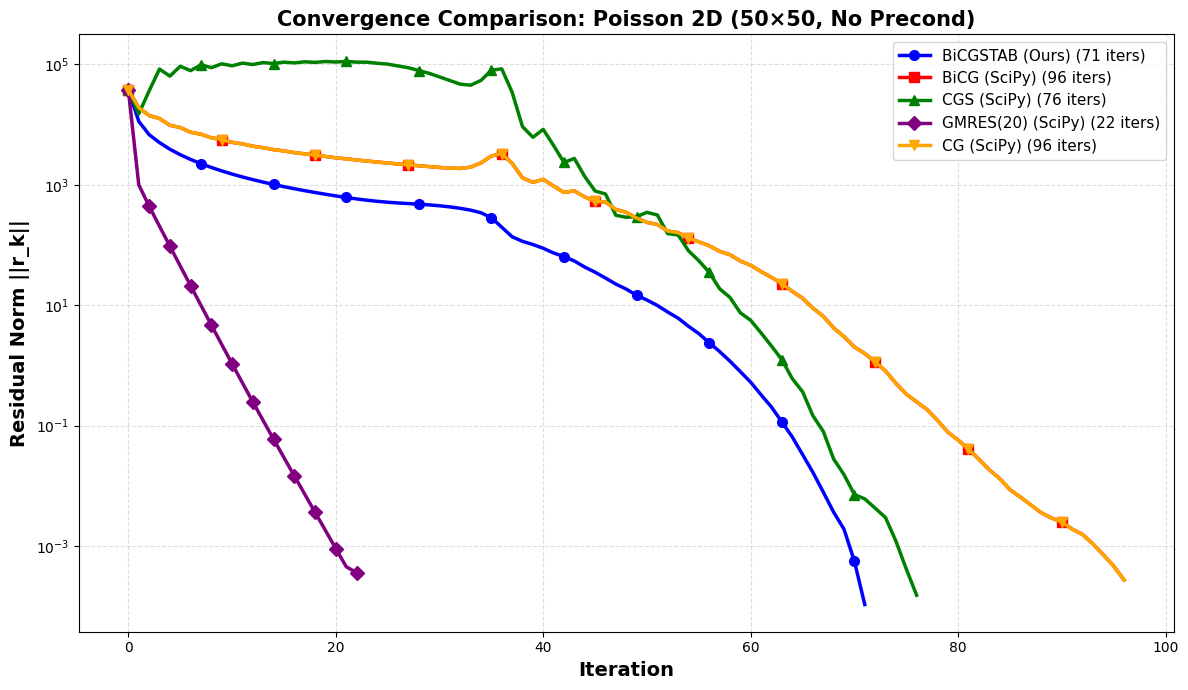

In [5]:
print("\n" + "█"*80)
print("CELL 9: TEST 1 - POISSON EQUATION (Symmetric SPD)")
print("█"*80)

nx = ny = 50
A_poisson = poisson_2d(nx, ny)
N_poisson = A_poisson.shape[0]
x_true_poisson = np.ones(N_poisson)
b_poisson = A_poisson.dot(x_true_poisson)

results_poisson = compare_all_solvers(A_poisson, b_poisson, x_true_poisson,
                                     "Poisson 2D (50×50)", use_precond=False)

plot_convergence_comparison(results_poisson, "Poisson 2D (50×50, No Precond)")

# Test 2 - Convection-Diffusion (High Péclet)


████████████████████████████████████████████████████████████████████████████████
CELL 10: TEST 2 - CONVECTION-DIFFUSION (High Péclet)
████████████████████████████████████████████████████████████████████████████████

Péclet number: 5.5

Problem: Conv-Diff High Péclet (40×40)
Size: 1600 unknowns
Preconditioning: None

Running BiCGSTAB (Our Implementation - Validated)...
  ✓ Converged: True, Iters: 74, Error: 2.598e-07, Time: 0.012s

Running BiCG (SciPy Reference)...
  ✓ Converged: True, Iters: 122, Error: 2.194e-07, Time: 0.020s

Running CGS (SciPy Reference)...
  ✓ Converged: True, Iters: 479, Error: 1.795e-08, Time: 0.063s

Running GMRES(20) (SciPy Reference)...
  ✓ Converged: True, Iters: 14, Error: 1.814e-07, Time: 0.054s


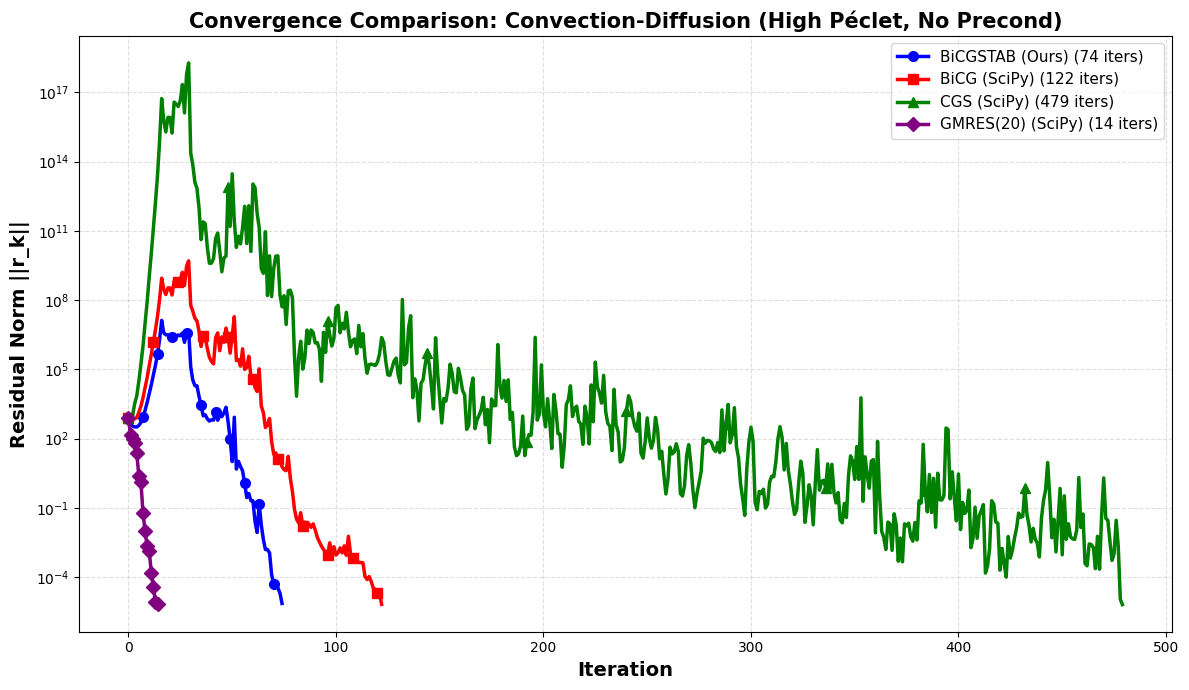

In [6]:
print("\n" + "█"*80)
print("CELL 10: TEST 2 - CONVECTION-DIFFUSION (High Péclet)")
print("█"*80)

nx = ny = 40
A_cd_high = convection_diffusion_2d(nx, ny, diffusion=0.01, vel=(2.0, 1.0))
N_cd_high = A_cd_high.shape[0]
x_true_cd_high = np.ones(N_cd_high)
b_cd_high = A_cd_high.dot(x_true_cd_high)

# Compute Péclet number
h = 1.0 / (nx + 1)
vel_mag = np.sqrt(2.0**2 + 1.0**2)
peclet = vel_mag * h / 0.01
print(f"\nPéclet number: {peclet:.1f}")

results_cd_high = compare_all_solvers(A_cd_high, b_cd_high, x_true_cd_high,
                                     "Conv-Diff High Péclet (40×40)", use_precond=False)

plot_convergence_comparison(results_cd_high, "Convection-Diffusion (High Péclet, No Precond)")

 # Test 3 - CGS Spiking Demonstration


████████████████████████████████████████████████████████████████████████████████
CELL 11: TEST 3 - CGS SPIKING vs BiCGSTAB SMOOTHNESS
████████████████████████████████████████████████████████████████████████████████


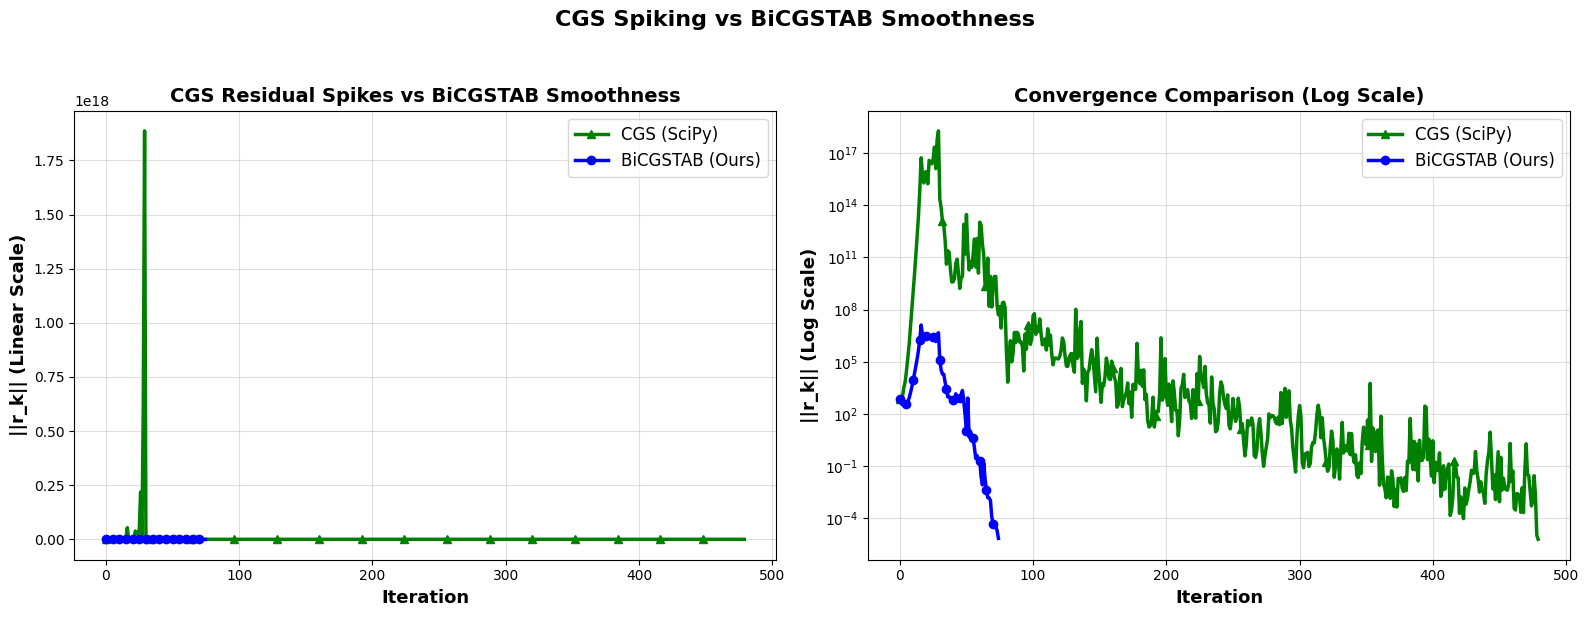


Max residual increase ratio:
  CGS (SciPy):     9,229.63×
  BiCGSTAB (Ours): 83.04×
  → BiCGSTAB is 111.2× more stable!


In [7]:
print("\n" + "█"*80)
print("CELL 11: TEST 3 - CGS SPIKING vs BiCGSTAB SMOOTHNESS")
print("█"*80)

plot_cgs_spiking_demo(results_cd_high, "CGS Spiking vs BiCGSTAB Smoothness")

# Test 4 - ILU Preconditioning Impact


████████████████████████████████████████████████████████████████████████████████
CELL 12: TEST 4 - ILU PRECONDITIONING IMPACT
████████████████████████████████████████████████████████████████████████████████

--- Without Preconditioning ---

Problem: Conv-Diff High Péclet (No Precond)
Size: 1600 unknowns
Preconditioning: None

Running BiCGSTAB (Our Implementation - Validated)...
  ✓ Converged: True, Iters: 74, Error: 2.598e-07, Time: 0.013s

Running BiCG (SciPy Reference)...
  ✓ Converged: True, Iters: 122, Error: 2.194e-07, Time: 0.022s

Running CGS (SciPy Reference)...
  ✓ Converged: True, Iters: 479, Error: 1.795e-08, Time: 0.065s

Running GMRES(20) (SciPy Reference)...
  ✓ Converged: True, Iters: 14, Error: 1.814e-07, Time: 0.055s

--- With ILU(0) Preconditioning ---

Problem: Conv-Diff High Péclet (ILU Precond)
Size: 1600 unknowns
Preconditioning: ILU(0)

Running BiCGSTAB (Our Implementation - Validated)...
  ✓ Converged: True, Iters: 44, Error: 3.272e-08, Time: 0.014s

Running Bi

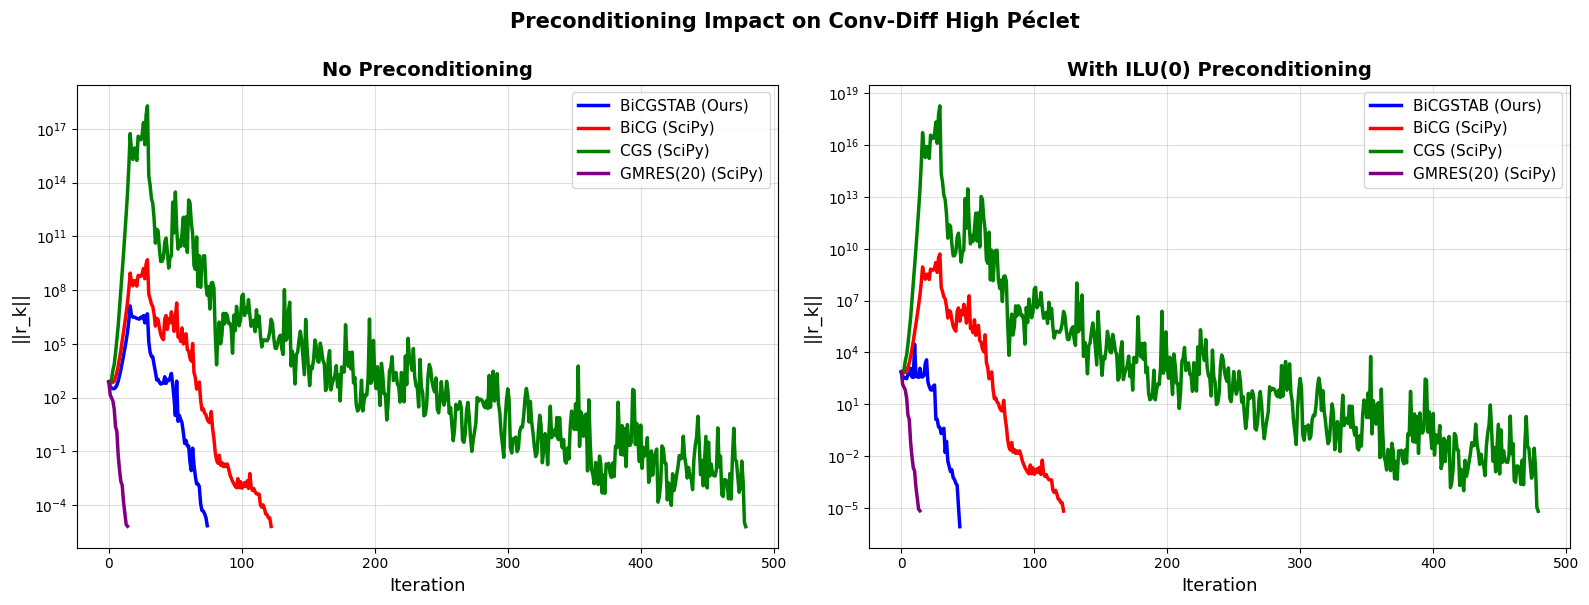


BiCGSTAB Preconditioning Impact:
  No precond: 74 iterations
  ILU precond: 44 iterations
  Speedup: 1.68×


In [8]:
print("\n" + "█"*80)
print("CELL 12: TEST 4 - ILU PRECONDITIONING IMPACT")
print("█"*80)

print("\n--- Without Preconditioning ---")
results_no_precond = compare_all_solvers(A_cd_high, b_cd_high, x_true_cd_high,
                                        "Conv-Diff High Péclet (No Precond)",
                                        use_precond=False)

print("\n--- With ILU(0) Preconditioning ---")
results_with_precond = compare_all_solvers(A_cd_high, b_cd_high, x_true_cd_high,
                                          "Conv-Diff High Péclet (ILU Precond)",
                                          use_precond=True)

# Side-by-side comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

colors = {'BiCGSTAB (Ours)': 'blue', 'BiCG (SciPy)': 'red',
          'CGS (SciPy)': 'green', 'GMRES(20) (SciPy)': 'purple'}

# Without preconditioning
for solver_name in ['BiCGSTAB (Ours)', 'BiCG (SciPy)', 'CGS (SciPy)', 'GMRES(20) (SciPy)']:
    if solver_name in results_no_precond:
        res = results_no_precond[solver_name]['info']['residuals']
        ax1.semilogy(res, label=f"{solver_name}", linewidth=2.5,
                    color=colors.get(solver_name, 'black'))

ax1.set_xlabel('Iteration', fontsize=13)
ax1.set_ylabel('||r_k||', fontsize=13)
ax1.set_title('No Preconditioning', fontweight='bold', fontsize=14)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.4)

# With preconditioning
for solver_name in ['BiCGSTAB (Ours)', 'BiCG (SciPy)', 'CGS (SciPy)', 'GMRES(20) (SciPy)']:
    if solver_name in results_with_precond:
        res = results_with_precond[solver_name]['info']['residuals']
        ax2.semilogy(res, label=f"{solver_name}", linewidth=2.5,
                    color=colors.get(solver_name, 'black'))

ax2.set_xlabel('Iteration', fontsize=13)
ax2.set_ylabel('||r_k||', fontsize=13)
ax2.set_title('With ILU(0) Preconditioning', fontweight='bold', fontsize=14)
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.4)

plt.suptitle('Preconditioning Impact on Conv-Diff High Péclet',
            fontsize=15, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Compute speedup
bicgstab_no = results_no_precond['BiCGSTAB (Ours)']['info']['iterations']
bicgstab_ilu = results_with_precond['BiCGSTAB (Ours)']['info']['iterations']
speedup = bicgstab_no / bicgstab_ilu

print(f"\nBiCGSTAB Preconditioning Impact:")
print(f"  No precond: {bicgstab_no} iterations")
print(f"  ILU precond: {bicgstab_ilu} iterations")
print(f"  Speedup: {speedup:.2f}×")

# Prepare for Summary 

In [9]:
import pickle

print("\n" + "█"*80)
print("SAVING RESULTS")
print("█"*80)

results_to_save = {
    'results_poisson': results_poisson,
    'results_cd_high': results_cd_high,
    'results_with_precond': results_with_precond,
    'A_cd_high': A_cd_high,
    'bicgstab_no': bicgstab_no,
    'bicgstab_ilu': bicgstab_ilu,
    'speedup': speedup
}

with open('bicgstab_results.pkl', 'wb') as f:
    pickle.dump(results_to_save, f)

print("✅ Results saved to bicgstab_results.pkl")
print("   You can now open summary.ipynb to generate tables and conclusions")



████████████████████████████████████████████████████████████████████████████████
SAVING RESULTS
████████████████████████████████████████████████████████████████████████████████
✅ Results saved to bicgstab_results.pkl
   You can now open summary.ipynb to generate tables and conclusions
